In [1]:
!pip3 install box2d-py==2.3.8
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from tqdm import trange
from DQN_agent import Agent
import time
%matplotlib inline

In [2]:
env = gym.make('LunarLander-v2')
env.seed(0)
agent = Agent(state_dim= env.observation_space.shape[0], n_actions=env.action_space.n,seed=0, BUFFER_SIZE = 100000, BATCH_SIZE=64,DISCOUNT=0.99,TAU=1,LR=7e-4,UPDATE_EVERY=4)
n_ep_running_average = 50

In [3]:
def running_average(x, N):
    ''' Function used to compute the running average
        of the last N elements of a vector x
    '''
    if len(x) >= N:
        y = np.copy(x)
        y[N-1:] = np.convolve(x, np.ones((N, )) / N, mode='valid')
    else:
        y = np.zeros_like(x)
    return y

In [4]:
n_episodes=1000
max_steps=1000
eps_end=0.01
eps_decay=0.995
eps = 1.0                    # initialize epsilon
episode_reward_list = []       # this list contains the total reward per episode
episode_number_of_steps = []   # this list contains the number of steps per episode
EPISODES = trange(n_episodes, desc='Episode: ', leave=True)

for i in EPISODES:
    state = env.reset()
    total_episode_reward = 0.
    t=0
    for k in range(max_steps):
        action = agent.act(state, eps)
        #env.render()
        next_state, reward, done, _ = env.step(action)
        total_episode_reward += reward
        agent.step(state, action, reward, next_state, done)
        state = next_state
        t+=1
        if done:
            break 
    episode_reward_list.append(total_episode_reward)
    episode_number_of_steps.append(t)
    eps = max(eps_end, eps_decay*eps) # decrease epsilon
    EPISODES.set_description("Episode {} - Reward/Steps: {:.1f}/{} - Avg. Reward/Steps: {:.1f}/{}".format(i, total_episode_reward, t,
    running_average(episode_reward_list, n_ep_running_average)[-1],
    running_average(episode_number_of_steps, n_ep_running_average)[-1]))



Episode 999 - Reward/Steps: 273.8/264 - Avg. Reward/Steps: 264.2/240: 100%|██████████| 1000/1000 [29:56<00:00,  1.80s/it]


In [5]:
Results ={}
Results['steps'] = episode_number_of_steps
Results['rewards'] = episode_reward_list
np.save('Plot_data.npy',Results)

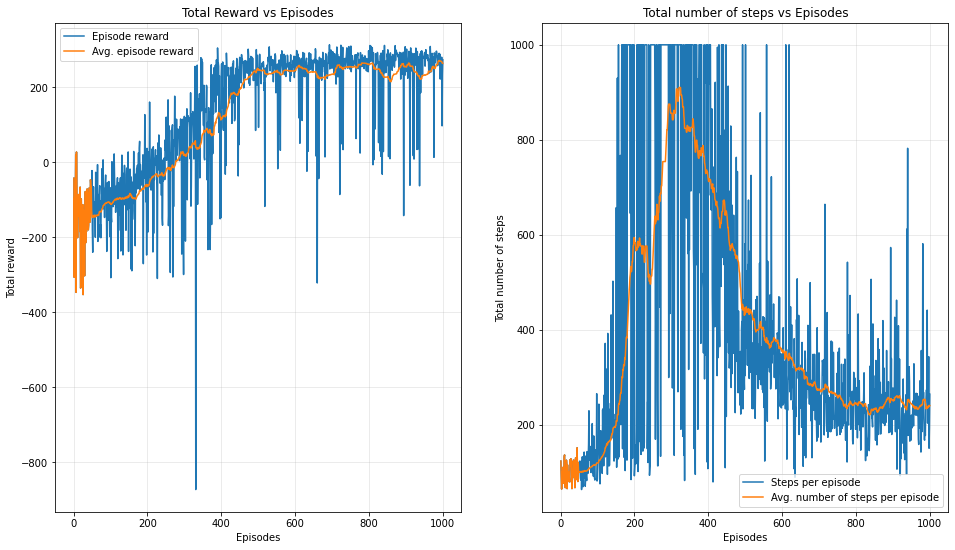

In [6]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 9))
ax[0].plot([i for i in range(1, n_episodes+1)], episode_reward_list, label='Episode reward')
ax[0].plot([i for i in range(1, n_episodes+1)], running_average(
    episode_reward_list, n_ep_running_average), label='Avg. episode reward')
ax[0].set_xlabel('Episodes')
ax[0].set_ylabel('Total reward')
ax[0].set_title('Total Reward vs Episodes')
ax[0].legend()
ax[0].grid(alpha=0.3)

ax[1].plot([i for i in range(1, n_episodes+1)], episode_number_of_steps, label='Steps per episode')
ax[1].plot([i for i in range(1, n_episodes+1)], running_average(
    episode_number_of_steps, n_ep_running_average), label='Avg. number of steps per episode')
ax[1].set_xlabel('Episodes')
ax[1].set_ylabel('Total number of steps')
ax[1].set_title('Total number of steps vs Episodes')
ax[1].legend()
ax[1].grid(alpha=0.3)
plt.show()

In [7]:
torch.save(agent.QNet.to('cpu'),'neural-network-1.pth')

In [23]:
!python DQN_check_solution.py

Network model: Neural_Network(
  (fc1): Linear(in_features=8, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=4, bias=True)
)
Checking solution...
Episode 49: 100% 50/50 [00:07<00:00,  6.75it/s]
Policy achieves an average total reward of 260.4 +/- 10.6 with confidence 95%.
Your policy passed the test!


In [25]:
torch.save(agent.QNet.state_dict(),'neural-network-1_state_dict.pth')